In [1]:
%matplotlib inline 

import numpy as np
class Perceptron(object):
    """Perceptron classifier
    
    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset
        
    Attributes
    ------------
    w_ : 1d-array
        Weights after fitting
    errors_ : list
        Number of misclassfications in every epoch
    """
    
    def __init__(self, eta = 0.01, n_iter = 10):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        """Fit training data.
        
        Parameters
        -----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples
            is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.
            
        Returns
        -------
        self : object
        
        """
        
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update =  self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

In [4]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
import matplotlib.pyplot as plt

In [7]:
y = df.iloc[0:100, 4].values

In [8]:
y = np.where(y == "Iris-setosa", -1, 1)

In [9]:
X = df.iloc[0:100, [0, 2]].values

/Users/Nafiz/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


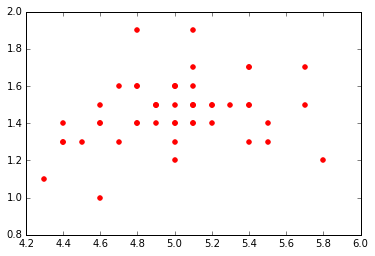

In [10]:
plt.scatter(X[:50, 0], X[:50, 1], color = 'red', marker ='o', label = 'setosa')

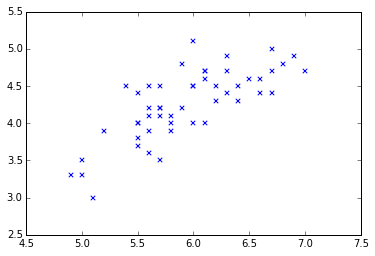

In [11]:
plt.scatter(X[50:100, 0], X[50:100, 1], color = 'blue', marker = 'x', label = 'versicolor')

/Users/Nafiz/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


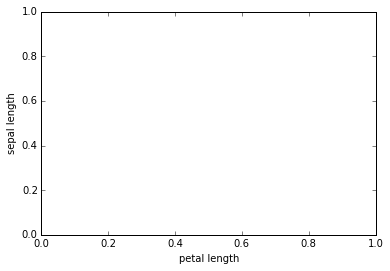

In [12]:
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc = "upper left")

In [17]:
plt.show()

In [14]:
ppn = Perceptron(eta = 0.1, n_iter = 10)

In [15]:
ppn.fit(X, y)

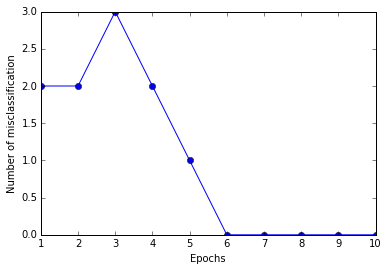

In [16]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker ='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassification')
plt.show()

In [36]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution = 0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.4, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    print xx1.shape
    print xx2.shape
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1],
                    alpha = 0.8, c = cmap(idx),
                    marker = markers[idx], label = cl)
                    

(305, 235)
(305, 235)


/Users/Nafiz/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:24: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 100 but corresponding boolean dimension is 2


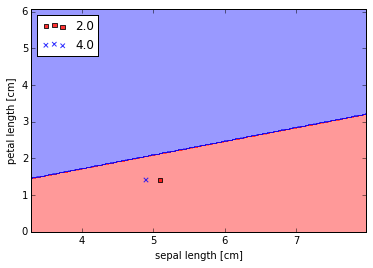

In [37]:
plot_decision_regions(X, y, classifier = ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc = 'upper left')
plt.show()

In [28]:
?np.meshgrid


In [29]:
nx, ny = (3, 2)
x = np.linspace(0, 1, nx)
y = np.linspace(2, 4, ny)
print x
print y
xv, yv = np.meshgrid(x, y)
print xv
print yv


[ 0.   0.5  1. ]
[ 2.  4.]
[[ 0.   0.5  1. ]
 [ 0.   0.5  1. ]]
[[ 2.  2.  2.]
 [ 4.  4.  4.]]
